Hi
I followed your code example to create a SST animation and it worked perfectly, though i dont fully understand bits of it. However, I'm trying to extend it now to include SST, mean sea level pressure and wind. 

When I convert it the intial frame plots, but while the SST frame continues to update the MSLP stays constant at the first frame. I also need to have the wind update as well. even when i take the SSTA out the msl doesnt update

Is there a way to make the animation update all these simultaneously?

Thanks!

Below is a simplified version of the code so far

In [1]:
import xarray 
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
from matplotlib import cm
from random import random
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [20]:
ds1 = xarray.open_mfdataset('/g/data/e14/jt8205/mhw_data_90pc/mhw_severity.pc90.150to180.-70to-50.1981.2020.nc', parallel=True)

ds2 = xarray.open_dataset('/g/data/e14/jt8205/atmos_data/anom_SLP_1980_2018_r360x180.nc')

In [53]:
ssta48 = ds1.ssta.sel(time=slice('2015-01-01','2015-03-15'))
mslp_Pa= ds2.anom_msl.sel(time=slice('2015-01-01T11:00:00', '2015-03-16T11:00:00')).sel(lon=slice(150,180), lat = slice(-70,-50))
mslp48 = mslp_Pa/100 #Convert from Pa to hPa

In [54]:
ssta48.shape,mslp48.shape

((74, 80, 120), (74, 20, 31))

# Here is the code for the animation with just the SST (That works fine)

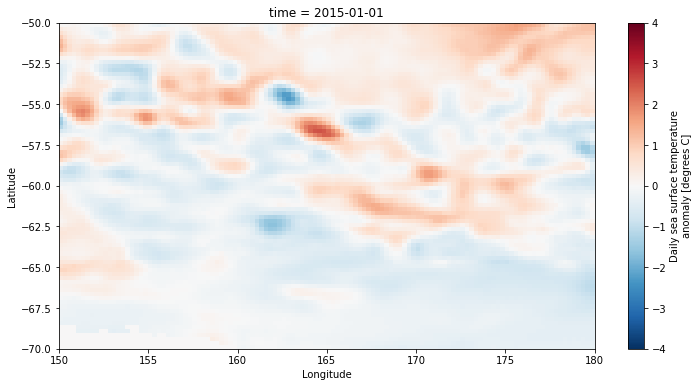

In [37]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

# Plot the initial frame. 
cax = ssta48[0,:,:].plot(
    add_colorbar=True,
    cmap='RdBu_r',
    vmin=-4, vmax=4,
    cbar_kwargs={
        'extend':'neither'
    }
)
plt.ylabel("Latitude")
plt.xlabel("Longitude")





# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(ssta48[frame,:,:].values.flatten())
    ax.set_title("Date = " + str(ssta48.coords['time'].values[frame])[:13])
    
# Finally, we use the animation module to create the animation.
ani = FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=74,       # Could also be iterable or list
    interval=150     # ms between frames
)

In [38]:
#Best way to view the animation without saving it
HTML(ani.to_jshtml())

In [39]:
#Saving the animation
#ani.save('/g/data/e14/jt8205/Animations/MHW_48_SSTA_MSLPA.mp4')

# Here is my attempt to put in the atmosphere

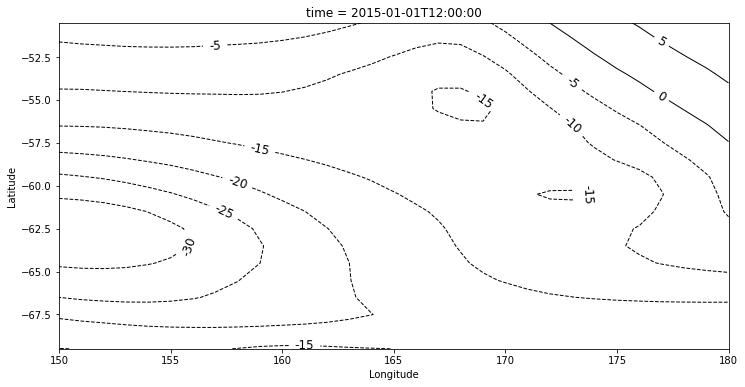

In [60]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

# Plot the initial frame. 

# Plot the ssta 
cax = ssta48[0,:,:].plot(
    add_colorbar=True,
    cmap='RdBu_r',
    vmin=-4, vmax=4,
    cbar_kwargs={
        'extend':'neither'
    }
)


 ## Plot the mslp

levels = np.arange(-65,65,5)

contour = mslp48[0,:,:].plot.contour(
    levels = levels,
    colors='k',
    linewidths=1, zorder=3
)
#Plot the pressure inline
plt.clabel(contour, levels, inline=True, fmt='%1i', fontsize=12)

plt.ylabel("Latitude")
plt.xlabel("Longitude")



# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(ssta48[frame,:,:].values.flatten())
    contour.set_array(mslp48[frame,:,:].values.flatten())
    ax.set_title("Date = " + str(ssta48.coords['time'].values[frame])[:13])
    
# Finally, we use the animation module to create the animation.
ani = FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=10,       # Could also be iterable or list
    interval=150     # ms between frames
)

In [61]:
#See how the ssta changes but the msl doesnt
HTML(ani.to_jshtml())

Text(0.5, 0, 'Longitude')

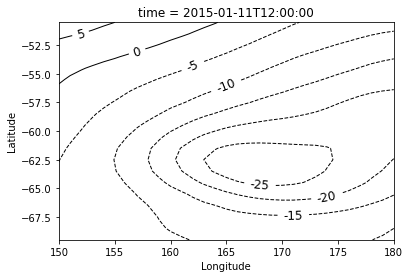

In [58]:
#See how the ssta changes but the msl doesnt
#for example at time = 30 the mslp should look like
contour = mslp48[10,:,:].plot.contour(
    levels = levels,
    colors='k',
    linewidths=1, zorder=3
)
#Plot the pressure inline
plt.clabel(contour, levels, inline=True, fmt='%1i', fontsize=12)

plt.ylabel("Latitude")
plt.xlabel("Longitude")